This notebook reads in six rate inversion products and compares them. Written to choose a (hopefully) final inversion method for paper. 
<br>
<br>
Written on 2-19-24. 
***
***


In [20]:
# import stuff
import os,sys
import glob 
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib  widget

Define working directory and dimensions of the maps/files.

In [21]:
workdir = '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'

# shape of unwrapped igrams for larger section with western mtns 
dx = 4000
dy = 1100

Define file names of rate maps I want to compare. 

In [22]:
# all the following are weighted by coh, referenced to select ref pix

# no topo correction, no phs jump cutoff
file1 = 'interval_5_unfilt_weighted_ref_to_ref_pix.r4'

# no topo correction, phs jump cutoff
file2 = 'interval_5_unfilt_weighted_ref_to_ref_pix_phs_jump_cutoff.r4'

# topo corrected (slope), simple average of ref pix, no phs jump cutoff
file3 = 'interval_5_unfilt_weighted_ref_to_ref_pix_topo_slope_corrected.r4'

# topo corrected (slope), simple average of ref pix, phs jump cutoff
file4 = 'interval_5_unfilt_weighted_ref_to_ref_pix_topo_slope_corrected_phs_jump_cutoff.r4'

# topo corrected (slope and intercept), no phs jump cutoff
file5 = 'interval_5_unfilt_weighted_topo_slope_and_intercept_corrected.r4'

# topo corrected (slope and intercept), phs jump cutoff
file6 = 'interval_5_unfilt_weighted_topo_slope_and_intercept_corrected_phs_jump_cutoff.r4'

#number of phase jumps
file7 = 'interval_5_unfilt_weighted_ref_to_ref_pix_num_wrap_errs_v4.r4' 

# new version of phase jump cutoff
file8 = 'interval_5_unfilt_weighted_ref_to_ref_pix_HP_phs_jump_cutoff.r4'

Actually read in those files. 

In [23]:
ds = gdal.Open(workdir+file1,gdal.GA_ReadOnly)
v1 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file2,gdal.GA_ReadOnly)
v2 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file3,gdal.GA_ReadOnly)
v3 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file4,gdal.GA_ReadOnly)
v4 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file5,gdal.GA_ReadOnly)
v5 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file6,gdal.GA_ReadOnly)
v6 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

ds = gdal.Open(workdir+file8,gdal.GA_ReadOnly)
v8 = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

# phase jumps
ds = gdal.Open(workdir+file7,gdal.GA_ReadOnly)
phs_jumps = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

Plot them.

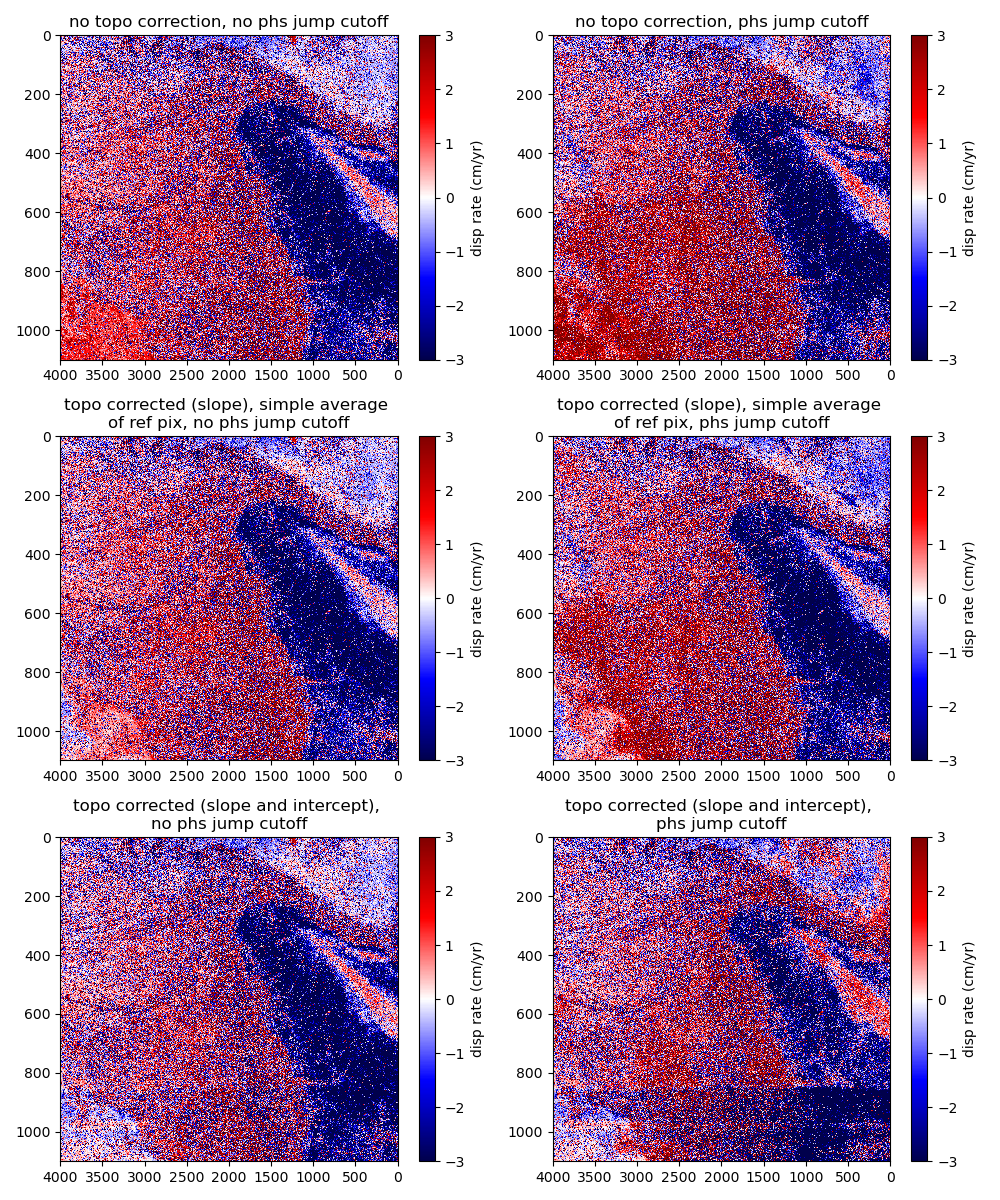

In [24]:
# parameters that stay the same for all subplots. 
vmin = -3
vmax = 3
rows = 3
cols = 2

plt.figure(figsize=(10,12),tight_layout=True)

plt.subplot(rows,cols,1)
plt.imshow(v1,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('no topo correction, no phs jump cutoff')

plt.subplot(rows,cols,2)
plt.imshow(v2,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('no topo correction, phs jump cutoff')

plt.subplot(rows,cols,3)
plt.imshow(v3,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('topo corrected (slope), simple average \nof ref pix, no phs jump cutoff')

plt.subplot(rows,cols,4)
plt.imshow(v4,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('topo corrected (slope), simple average \nof ref pix, phs jump cutoff')

plt.subplot(rows,cols,5)
plt.imshow(v5,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('topo corrected (slope and intercept), \nno phs jump cutoff')

plt.subplot(rows,cols,6)
plt.imshow(v6,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('topo corrected (slope and intercept), \nphs jump cutoff')

#plt.savefig('/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/comparison_test.png',transparent=True)
plt.show()

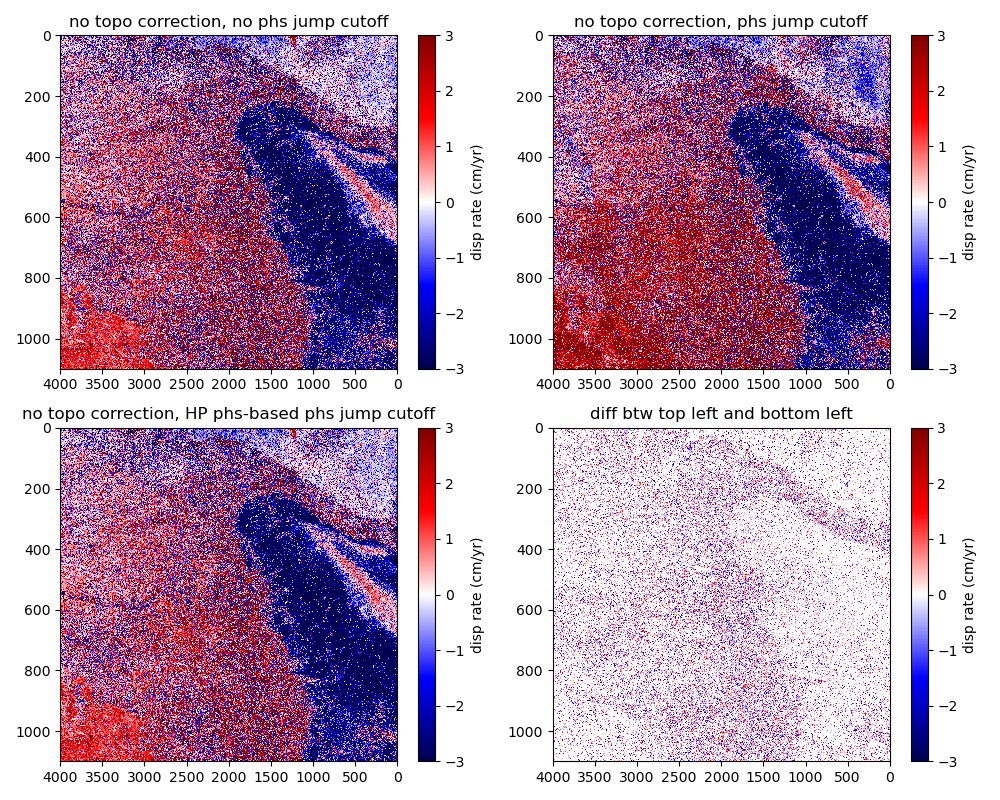

In [25]:
# parameters that stay the same for all subplots. 
vmin = -3
vmax = 3
rows = 2
cols = 2

plt.figure(figsize=(10,8),tight_layout=True)

plt.subplot(rows,cols,1)
plt.imshow(v1,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('no topo correction, no phs jump cutoff')

plt.subplot(rows,cols,2)
plt.imshow(v2,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('no topo correction, phs jump cutoff')

plt.subplot(rows,cols,3)
plt.imshow(v8,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('no topo correction, HP phs-based phs jump cutoff')

plt.subplot(rows,cols,4)
plt.imshow(v8-v1,vmin=vmin,vmax=vmax,cmap='seismic',aspect='auto',interpolation='none')
plt.xlim(dx,0); plt.colorbar(label='disp rate (cm/yr)')
plt.title('diff btw top left and bottom left')

plt.show()

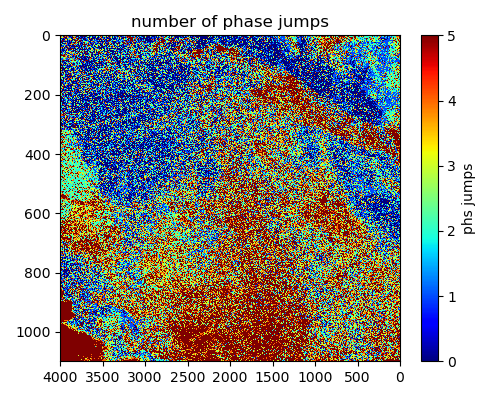

In [26]:
plt.figure(figsize=(5,4),tight_layout=True)
plt.imshow(phs_jumps,cmap='jet',aspect='auto',interpolation='none',vmin=0,vmax=5)
plt.xlim(dx,0); plt.colorbar(label='phs jumps')
plt.title('number of phase jumps')
plt.show()

In [27]:
print(np.sum([phs_jumps<2]))

1261642


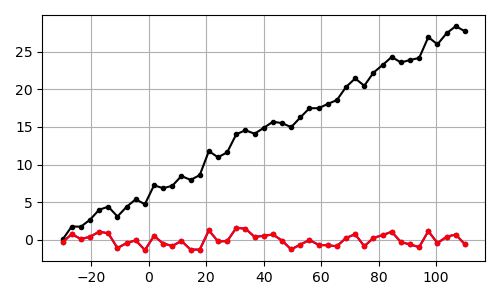

In [28]:
numpts = 45
x = np.linspace(-30,110,numpts) #els
slope = 0.2
intercept = 5
y = slope*x + intercept # phs
y = y + (np.random.random((numpts))*3)

m,b = np.polyfit(x,y,1)

yCorr1 = y - (x)*m - b

yCorr2 = y - (x-min(x))*m
yCorr2 = yCorr2 - np.mean(yCorr2)

plt.figure(figsize=(5,3),tight_layout=True)
plt.plot(x,y,'k.-')
plt.plot(x,yCorr1,'b.-')
plt.plot(x,yCorr2,'r.-')
plt.grid()
plt.show()